<a href="https://colab.research.google.com/github/Dr-Rao-Patike/DL-2024-25/blob/main/Clinical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Initial Weight Matrices

# W1 - Depthwise Convolution Layer (3x3 Matrix)
W1_initial = [
    [0.5, 0,   0.2],
    [0,   0.1, 0],
    [0.4, 0.6, 0]
]
print("Initial W1 (Depthwise Convolution Layer, 3x3 Matrix):")
print(W1_initial)
print("Initial Sparsity: 44% (4/9 elements are zero)")

# W2 - Pointwise Convolution Layer (2x2 Matrix)
W2_initial = [
    [0.3, 0.7],
    [0,   0]
]
print("\nInitial W2 (Pointwise Convolution Layer, 2x2 Matrix):")
print(W2_initial)
print("Initial Sparsity: 50% (2/4 elements are zero)")

# W3 - Fully Connected Layer (2x3 Matrix)
W3_initial = [
    [0.1, 0,   0.2],
    [0.3, 0,   0.4]
]
print("\nInitial W3 (Fully Connected Layer, 2x3 Matrix):")
print(W3_initial)
print("Initial Sparsity: 33% (2/6 elements are zero)")

# Weight Matrices After RL Actions

# W1 after increasing sparsity
W1_post_action = [
    [0,   0,   0.2],
    [0,   0.1, 0],
    [0,   0.6, 0]
]
print("\nPost-Action W1 (Increased Sparsity):")
print(W1_post_action)
print("Post-Action Sparsity: 67% (6/9 elements are zero)")

# W2 after decreasing sparsity
W2_post_action = [
    [0.3, 0.7],
    [0.2, 0.1]
]
print("\nPost-Action W2 (Decreased Sparsity):")
print(W2_post_action)
print("Post-Action Sparsity: 0% (0/4 elements are zero)")

# W3 sparsity maintained
W3_post_action = W3_initial  # No change
print("\nPost-Action W3 (Sparsity Maintained):")
print(W3_post_action)
print("Post-Action Sparsity: 33% (2/6 elements are zero)")


Initial W1 (Depthwise Convolution Layer, 3x3 Matrix):
[[0.5, 0, 0.2], [0, 0.1, 0], [0.4, 0.6, 0]]
Initial Sparsity: 44% (4/9 elements are zero)

Initial W2 (Pointwise Convolution Layer, 2x2 Matrix):
[[0.3, 0.7], [0, 0]]
Initial Sparsity: 50% (2/4 elements are zero)

Initial W3 (Fully Connected Layer, 2x3 Matrix):
[[0.1, 0, 0.2], [0.3, 0, 0.4]]
Initial Sparsity: 33% (2/6 elements are zero)

Post-Action W1 (Increased Sparsity):
[[0, 0, 0.2], [0, 0.1, 0], [0, 0.6, 0]]
Post-Action Sparsity: 67% (6/9 elements are zero)

Post-Action W2 (Decreased Sparsity):
[[0.3, 0.7], [0.2, 0.1]]
Post-Action Sparsity: 0% (0/4 elements are zero)

Post-Action W3 (Sparsity Maintained):
[[0.1, 0, 0.2], [0.3, 0, 0.4]]
Post-Action Sparsity: 33% (2/6 elements are zero)


# **Machine Learning Algorithms**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kits19-master/pathologicaldata.csv')

# Identify categorical and numerical columns
categorical_columns = ['gender', 'smoking_history', 'age_when_quit_smoking',
                        'chewing_tobacco_use', 'alcohol_use', 'hospitalization',
                        'ischemia_time', 'pathology_t_stage', 'pathology_n_stage',
                        'pathology_m_stage', 'tumor_histologic_subtype', 'tumor_necrosis',
                        'clavien_surgical_complications', 'er_visit', 'readmission',
                        'surgery_type', 'surgical_procedure', 'surgical_approach',
                        'vital_status']

numerical_columns = ['age_at_nephrectomy', 'body_mass_index',
                      'comorbidities_myocardial_infarction',
                      'comorbidities_congestive_heart_failure',
                      'comorbidities_peripheral_vascular_disease',
                      'comorbidities_cerebrovascular_disease', 'comorbidities_dementia',
                      'comorbidities_copd', 'comorbidities_connective_tissue_disease',
                      'comorbidities_peptic_ulcer_disease',
                      'comorbidities_uncomplicated_diabetes_mellitus',
                      'comorbidities_diabetes_mellitus_with_end_organ_damage',
                      'comorbidities_chronic_kidney_disease',
                      'comorbidities_hemiplegia_from_stroke', 'comorbidities_leukemia',
                      'comorbidities_malignant_lymphoma',
                      'comorbidities_localized_solid_tumor',
                      'comorbidities_metastatic_solid_tumor',
                      'comorbidities_mild_liver_disease',
                      'comorbidities_moderate_to_severe_liver_disease', 'comorbidities_aids',
                      'pack_years', 'intraoperative_complications_blood_transfusion',
                      'intraoperative_complications_injury_to_surrounding_organ',
                      'intraoperative_complications_cardiac_event', 'radiographic_size',
                      'pathologic_size', 'malignant', 'tumor_isup_grade',
                      'estimated_blood_loss', 'operative_time', 'cytoreductive',
                      'positive_resection_margins', 'last_preop_egfr_value',
                      'last_preop_egfr_days_before_nephrectomy', 'first_postop_egfr_value',
                      'first_postop_egfr_days_before_nephrectomy', 'last_postop_egfr_value',
                      'last_postop_egfr_days_before_nephrectomy', 'vital_days_after_surgery',
                      'voxel_spacing_x_spacing', 'voxel_spacing_y_spacing',
                      'voxel_spacing_z_spacing']

# Fill missing values
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical columns with special character handling
label_encoders = {}
for col in categorical_columns:
    try:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    except TypeError:
        # Handle the case where encoding fails due to '<' character
        print(f"Skipping encoding for column {col} due to the presence of special characters.")

# Calculate changes in kidney function
data['preop_to_postop_change'] = data['first_postop_egfr_value'] - data['last_preop_egfr_value']
data['postop_to_last_change'] = data['last_postop_egfr_value'] - data['first_postop_egfr_value']


# Select relevant features for risk assessment and tumor classification
selected_features = categorical_columns + numerical_columns + ['preop_to_postop_change', 'postop_to_last_change']
data = data[selected_features]  # Remove 'pathologic_size' from selected_features

# Set the tumor size classes based on a threshold
threshold_large_tumor = 7  # Example threshold, adjust as needed
data['tumor_size_class'] = 'Small'
data.loc[data['pathologic_size'] >= threshold_large_tumor, 'tumor_size_class'] = 'Large'

# Set the tumor stage based on the pathology stages
data['tumor_stage'] = data['pathology_t_stage'] + data['pathology_n_stage'] + data['pathology_m_stage']

# Set the risk levels based on the threshold
threshold = 10
data['risk_level'] = 'Stage-0'  # Default to Normal
data.loc[(data['preop_to_postop_change'] < threshold) & (data['postop_to_last_change'] < threshold), 'risk_level'] = 'Stage-1'
data.loc[((data['preop_to_postop_change'] < 0) & (data['postop_to_last_change'] < 0)), 'risk_level'] = 'Stage-2'


# Separate features and target variables
X_risk = data.drop(['tumor_size_class', 'tumor_stage', 'risk_level'], axis=1)
y_tumor_size = data['tumor_size_class']
y_tumor_stage = data['tumor_stage']
y_kidney_function = data['risk_level']
print(data)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kits19-master/pathologicaldata.csv')

# Identify categorical and numerical columns
categorical_columns = ['gender', 'smoking_history', 'age_when_quit_smoking',
                        'chewing_tobacco_use', 'alcohol_use', 'hospitalization',
                        'ischemia_time', 'pathology_t_stage', 'pathology_n_stage',
                        'pathology_m_stage', 'tumor_histologic_subtype', 'tumor_necrosis',
                        'clavien_surgical_complications', 'er_visit', 'readmission',
                        'surgery_type', 'surgical_procedure', 'surgical_approach',
                        'vital_status']

numerical_columns = ['age_at_nephrectomy', 'body_mass_index',
                      'comorbidities_myocardial_infarction',
                      'comorbidities_congestive_heart_failure',
                      'comorbidities_peripheral_vascular_disease',
                      'comorbidities_cerebrovascular_disease', 'comorbidities_dementia',
                      'comorbidities_copd', 'comorbidities_connective_tissue_disease',
                      'comorbidities_peptic_ulcer_disease',
                      'comorbidities_uncomplicated_diabetes_mellitus',
                      'comorbidities_diabetes_mellitus_with_end_organ_damage',
                      'comorbidities_chronic_kidney_disease',
                      'comorbidities_hemiplegia_from_stroke', 'comorbidities_leukemia',
                      'comorbidities_malignant_lymphoma',
                      'comorbidities_localized_solid_tumor',
                      'comorbidities_metastatic_solid_tumor',
                      'comorbidities_mild_liver_disease',
                      'comorbidities_moderate_to_severe_liver_disease', 'comorbidities_aids',
                      'pack_years', 'intraoperative_complications_blood_transfusion',
                      'intraoperative_complications_injury_to_surrounding_organ',
                      'intraoperative_complications_cardiac_event', 'radiographic_size',
                      'pathologic_size', 'malignant', 'tumor_isup_grade',
                      'estimated_blood_loss', 'operative_time', 'cytoreductive',
                      'positive_resection_margins', 'last_preop_egfr_value',
                      'last_preop_egfr_days_before_nephrectomy', 'first_postop_egfr_value',
                      'first_postop_egfr_days_before_nephrectomy', 'last_postop_egfr_value',
                      'last_postop_egfr_days_before_nephrectomy', 'vital_days_after_surgery',
                      'voxel_spacing_x_spacing', 'voxel_spacing_y_spacing',
                      'voxel_spacing_z_spacing']

# Fill missing values
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical columns with special character handling
label_encoders = {}
for col in categorical_columns:
    try:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    except TypeError:
        # Handle the case where encoding fails due to '<' character
        print(f"Skipping encoding for column {col} due to the presence of special characters.")

# Calculate changes in kidney function
data['preop_to_postop_change'] = data['first_postop_egfr_value'] - data['last_preop_egfr_value']
data['postop_to_last_change'] = data['last_postop_egfr_value'] - data['first_postop_egfr_value']

# Select relevant features for risk assessment
selected_features = categorical_columns + numerical_columns + ['preop_to_postop_change', 'postop_to_last_change']
data = data[selected_features]

# Set the risk levels based on the threshold
threshold = 10
data['risk_level'] = 'Stage-0'  # Default to Normal
data.loc[(data['preop_to_postop_change'] < threshold) & (data['postop_to_last_change'] < threshold), 'risk_level'] = 'Stage=1'
data.loc[((data['preop_to_postop_change'] < 0) & (data['postop_to_last_change'] < 0)), 'risk_level'] = 'Stage=2'

# Replace '<' in categorical columns
for col in categorical_columns:
    data[col] = data[col].replace('<', 'less_than').astype(str)

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Automation Feature Selection**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kits19-master/pathologicaldata.csv')

# Identify categorical and numerical columns
categorical_columns = ['gender', 'smoking_history', 'age_when_quit_smoking',
                        'chewing_tobacco_use', 'alcohol_use', 'hospitalization',
                        'ischemia_time', 'pathology_t_stage', 'pathology_n_stage',
                        'pathology_m_stage', 'tumor_histologic_subtype', 'tumor_necrosis',
                        'clavien_surgical_complications', 'er_visit', 'readmission',
                        'surgery_type', 'surgical_procedure', 'surgical_approach',
                        'vital_status']

numerical_columns = ['age_at_nephrectomy', 'body_mass_index',
                      'comorbidities_myocardial_infarction',
                      'comorbidities_congestive_heart_failure',
                      'comorbidities_peripheral_vascular_disease',
                      'comorbidities_cerebrovascular_disease', 'comorbidities_dementia',
                      'comorbidities_copd', 'comorbidities_connective_tissue_disease',
                      'comorbidities_peptic_ulcer_disease',
                      'comorbidities_uncomplicated_diabetes_mellitus',
                      'comorbidities_diabetes_mellitus_with_end_organ_damage',
                      'comorbidities_chronic_kidney_disease',
                      'comorbidities_hemiplegia_from_stroke', 'comorbidities_leukemia',
                      'comorbidities_malignant_lymphoma',
                      'comorbidities_localized_solid_tumor',
                      'comorbidities_metastatic_solid_tumor',
                      'comorbidities_mild_liver_disease',
                      'comorbidities_moderate_to_severe_liver_disease', 'comorbidities_aids',
                      'pack_years', 'intraoperative_complications_blood_transfusion',
                      'intraoperative_complications_injury_to_surrounding_organ',
                      'intraoperative_complications_cardiac_event', 'radiographic_size',
                      'pathologic_size', 'malignant', 'tumor_isup_grade',
                      'estimated_blood_loss', 'operative_time', 'cytoreductive',
                      'positive_resection_margins', 'last_preop_egfr_value',
                      'last_preop_egfr_days_before_nephrectomy', 'first_postop_egfr_value',
                      'first_postop_egfr_days_before_nephrectomy', 'last_postop_egfr_value',
                      'last_postop_egfr_days_before_nephrectomy', 'vital_days_after_surgery',
                      'voxel_spacing_x_spacing', 'voxel_spacing_y_spacing',
                      'voxel_spacing_z_spacing']

# Fill missing values
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical columns with special character handling
label_encoders = {}
for col in categorical_columns:
    try:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    except TypeError:
        # Handle the case where encoding fails due to '<' character
        print(f"Skipping encoding for column {col} due to the presence of special characters.")

# Calculate changes in kidney function
data['preop_to_postop_change'] = data['first_postop_egfr_value'] - data['last_preop_egfr_value']
data['postop_to_last_change'] = data['last_postop_egfr_value'] - data['first_postop_egfr_value']

# Select relevant features for risk assessment
selected_features = categorical_columns + numerical_columns + ['preop_to_postop_change', 'postop_to_last_change']
data = data[selected_features]

# Set the risk levels based on the threshold
threshold = 2
data['risk_level'] = 'Stage-0'  # Default to Normal
data.loc[(data['preop_to_postop_change'] < threshold) & (data['postop_to_last_change'] < threshold), 'risk_level'] = 'Stage=1'
data.loc[((data['preop_to_postop_change'] < 0) & (data['postop_to_last_change'] < 0)), 'risk_level'] = 'Stage=2'

# Replace '<' in categorical columns
for col in categorical_columns:
    data[col] = data[col].replace('<', 'less_than').astype(str)

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Skipping encoding for column tumor_necrosis due to the presence of special characters.
Skipping encoding for column er_visit due to the presence of special characters.
Skipping encoding for column readmission due to the presence of special characters.


In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Convert categorical columns to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Apply mutual_info_classif
mi = mutual_info_classif(X_encoded, y)

# Create a DataFrame with feature names and their mutual information scores
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'Mutual_Info_Score': mi})

# Sort the DataFrame by mutual information scores in descending order
mi_df = mi_df.sort_values(by='Mutual_Info_Score', ascending=False)

# Print the sorted DataFrame
print("Important Features based on Mutual Information:")
print(mi_df)

In [ ]:
# Select the top N features
top_features = mi_df.head(10)['Feature'].tolist()

# Print the top features
print("Top 10 Features:")
print(top_features)


Top 10 Features:
['postop_to_last_change', 'preop_to_postop_change', 'last_postop_egfr_value', 'ischemia_time_37', 'first_postop_egfr_days_before_nephrectomy', 'comorbidities_localized_solid_tumor', 'ischemia_time_6', 'first_postop_egfr_value', 'ischemia_time_4', 'tumor_histologic_subtype_10']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
import pandas as pd

# Assuming X and y are your features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical and numerical columns
categorical_columns = ['gender', 'smoking_history', 'age_when_quit_smoking',
                        'chewing_tobacco_use', 'alcohol_use', 'hospitalization',
                        'ischemia_time', 'pathology_t_stage', 'pathology_n_stage',
                        'pathology_m_stage', 'tumor_histologic_subtype', 'tumor_necrosis',
                        'clavien_surgical_complications', 'er_visit', 'readmission',
                        'surgery_type', 'surgical_procedure', 'surgical_approach',
                        'vital_status']

numerical_columns = ['age_at_nephrectomy', 'body_mass_index',
                      'comorbidities_myocardial_infarction',
                      'comorbidities_congestive_heart_failure',
                      'comorbidities_peripheral_vascular_disease',
                      'comorbidities_cerebrovascular_disease', 'comorbidities_dementia',
                      'comorbidities_copd', 'comorbidities_connective_tissue_disease',
                      'comorbidities_peptic_ulcer_disease',
                      'comorbidities_uncomplicated_diabetes_mellitus',
                      'comorbidities_diabetes_mellitus_with_end_organ_damage',
                      'comorbidities_chronic_kidney_disease',
                      'comorbidities_hemiplegia_from_stroke', 'comorbidities_leukemia',
                      'comorbidities_malignant_lymphoma',
                      'comorbidities_localized_solid_tumor',
                      'comorbidities_metastatic_solid_tumor',
                      'comorbidities_mild_liver_disease',
                      'comorbidities_moderate_to_severe_liver_disease', 'comorbidities_aids',
                      'pack_years', 'intraoperative_complications_blood_transfusion',
                      'intraoperative_complications_injury_to_surrounding_organ',
                      'intraoperative_complications_cardiac_event', 'radiographic_size',
                      'pathologic_size', 'malignant', 'tumor_isup_grade',
                      'estimated_blood_loss', 'operative_time', 'cytoreductive',
                      'positive_resection_margins', 'last_preop_egfr_value',
                      'last_preop_egfr_days_before_nephrectomy', 'first_postop_egfr_value',
                      'first_postop_egfr_days_before_nephrectomy', 'last_postop_egfr_value',
                      'last_postop_egfr_days_before_nephrectomy', 'vital_days_after_surgery',
                      'voxel_spacing_x_spacing', 'voxel_spacing_y_spacing',
                      'voxel_spacing_z_spacing']

# Preprocess categorical features with one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Preprocess numerical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Bundle preprocessing for both numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)])

# Define the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the full pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Apply permutation feature importance
perm_importance = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

# Get the permutation importances and feature names
perm_importances = perm_importance.importances_mean
feature_names = X_test.columns

# Create a DataFrame to store the results
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Permutation_Importance': perm_importances})

# Sort the DataFrame by importance values
perm_importance_df = perm_importance_df.sort_values(by='Permutation_Importance', ascending=False)

# Print or visualize the permutation importances
print(perm_importance_df)


                           Feature  Permutation_Importance
52           last_preop_egfr_value                0.063889
12  clavien_surgical_complications                0.015000
14                     readmission                0.013889
26              comorbidities_copd                0.013333
61         voxel_spacing_z_spacing                0.011667
..                             ...                     ...
11                  tumor_necrosis               -0.011667
54         first_postop_egfr_value               -0.012778
56          last_postop_egfr_value               -0.013889
58        vital_days_after_surgery               -0.018333
10        tumor_histologic_subtype               -0.021667

[64 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kits19-master/pathologicaldata.csv')

# Identify categorical and numerical columns
categorical_columns = ['gender', 'smoking_history', 'age_when_quit_smoking',
                        'chewing_tobacco_use', 'alcohol_use', 'hospitalization',
                        'ischemia_time', 'pathology_t_stage', 'pathology_n_stage',
                        'pathology_m_stage', 'tumor_histologic_subtype', 'tumor_necrosis',
                        'clavien_surgical_complications', 'er_visit', 'readmission',
                        'surgery_type', 'surgical_procedure', 'surgical_approach',
                        'vital_status']

numerical_columns = ['age_at_nephrectomy', 'body_mass_index',
                      'comorbidities_myocardial_infarction',
                      'comorbidities_congestive_heart_failure',
                      'comorbidities_peripheral_vascular_disease',
                      'comorbidities_cerebrovascular_disease', 'comorbidities_dementia',
                      'comorbidities_copd', 'comorbidities_connective_tissue_disease',
                      'comorbidities_peptic_ulcer_disease',
                      'comorbidities_uncomplicated_diabetes_mellitus',
                      'comorbidities_diabetes_mellitus_with_end_organ_damage',
                      'comorbidities_chronic_kidney_disease',
                      'comorbidities_hemiplegia_from_stroke', 'comorbidities_leukemia',
                      'comorbidities_malignant_lymphoma',
                      'comorbidities_localized_solid_tumor',
                      'comorbidities_metastatic_solid_tumor',
                      'comorbidities_mild_liver_disease',
                      'comorbidities_moderate_to_severe_liver_disease', 'comorbidities_aids',
                      'pack_years', 'intraoperative_complications_blood_transfusion',
                      'intraoperative_complications_injury_to_surrounding_organ',
                      'intraoperative_complications_cardiac_event', 'radiographic_size',
                      'pathologic_size', 'malignant', 'tumor_isup_grade',
                      'estimated_blood_loss', 'operative_time', 'cytoreductive',
                      'positive_resection_margins', 'last_preop_egfr_value',
                      'last_preop_egfr_days_before_nephrectomy', 'first_postop_egfr_value',
                      'first_postop_egfr_days_before_nephrectomy', 'last_postop_egfr_value',
                      'last_postop_egfr_days_before_nephrectomy', 'vital_days_after_surgery',
                      'voxel_spacing_x_spacing', 'voxel_spacing_y_spacing',
                      'voxel_spacing_z_spacing']

# Fill missing values
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Encode categorical columns with special character handling
label_encoders = {}
for col in categorical_columns:
    try:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    except TypeError:
        # Handle the case where encoding fails due to '<' character
        print(f"Skipping encoding for column {col} due to the presence of special characters.")

# Calculate changes in kidney function
data['preop_to_postop_change'] = data['first_postop_egfr_value'] - data['last_preop_egfr_value']
data['postop_to_last_change'] = data['last_postop_egfr_value'] - data['first_postop_egfr_value']

# Select relevant features for risk assessment
selected_features = categorical_columns + numerical_columns + ['preop_to_postop_change', 'postop_to_last_change']
data = data[selected_features]

# Set the risk levels based on the threshold
threshold = 10
data['risk_level'] = 'Stage-0'  # Default to Normal
data.loc[(data['preop_to_postop_change'] < threshold) & (data['postop_to_last_change'] < threshold), 'risk_level'] = 'Stage=1'
data.loc[((data['preop_to_postop_change'] < 0) & (data['postop_to_last_change'] < 0)), 'risk_level'] = 'Stage=2'

# Replace '<' in categorical columns
for col in categorical_columns:
    data[col] = data[col].replace('<', 'less_than').astype(str)

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))])  # Change to sparse=False

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the full pipeline using imblearn.pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),  # Assuming smote is defined
    ('rf_classifier', model)])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_

# Get the feature names
feature_names = X.columns
# Create a DataFrame to store the results
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values
importance_df = importance_df.sort_values(by='Importance', ascending=False)




# **Graph With Selected Features**

In [ ]:
import pandas as pd
# Load the dataset into a pandas DataFrame
data = pd.read_csv('/content/drive/MyDrive/kits19-master/pathologicaldata.csv')

# Select relevant features for risk assessment
selected_features = [
    'age_at_nephrectomy',
    'gender',
    'body_mass_index',
    'comorbidities_myocardial_infarction',
    'comorbidities_congestive_heart_failure',
    'comorbidities_chronic_kidney_disease',
    # Add more relevant features here
    'last_preop_egfr_value',
    'first_postop_egfr_value',
    'last_postop_egfr_value'
]
data = data[selected_features]
# Calculate changes in kidney function
data['preop_to_postop_change'] = data['first_postop_egfr_value'] - data['last_preop_egfr_value']
data['postop_to_last_change'] = data['last_postop_egfr_value'] - data['first_postop_egfr_value']
# Set the risk levels based on the threshold
threshold = 10
data['risk_level'] = 'Stage-0'  # Default to Normal
data.loc[(data['preop_to_postop_change'] < threshold) & (data['postop_to_last_change'] < threshold), 'risk_level'] = 'Stage=1'
data.loc[((data['preop_to_postop_change'] < 0) & (data['postop_to_last_change'] < 0)), 'risk_level'] = 'Stage=2'
# Display the updated DataFrame with risk levels
#print(data)

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Fit the preprocessor on the training data and transform both training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf_classifier', rf_classifier)])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Access the RandomForestClassifier step from the pipeline
rf_model = pipeline.named_steps['rf_classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns[:len(feature_importances)], 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Classification Report:
               precision    recall  f1-score   support

     Stage-0       0.97      1.00      0.98        29
     Stage=1       1.00      0.96      0.98        27
     Stage=2       1.00      1.00      1.00         4

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Feature Importances:
                                   Feature  Importance
5    comorbidities_chronic_kidney_disease    0.259854
6                   last_preop_egfr_value    0.195303
4  comorbidities_congestive_heart_failure    0.179919
2                         body_mass_index    0.136037
3     comorbidities_myocardial_infarction    0.120780
0                      age_at_nephrectomy    0.048975
1                                  gender    0.042600
7                 first_postop_egfr_value    0.009072
8                  last_postop_egfr_value    0.007405
9                  preop_to_post

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Separate features and target variable
X = data.drop('risk_level', axis=1)
y = data['risk_level']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the SMOTE
smote = SMOTE(random_state=42)

# Create the full pipeline using imblearn.pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote),  # Add SMOTE step to the pipeline
    ('rf_classifier', rf_classifier)])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Access the RandomForestClassifier step from the pipeline
rf_model = pipeline.named_steps['rf_classifier']

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns[:len(feature_importances)], 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Classification Report:
               precision    recall  f1-score   support

     Stage-0       0.97      1.00      0.98        29
     Stage=1       1.00      0.96      0.98        27
     Stage=2       1.00      1.00      1.00         4

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60


Feature Importances:
                                   Feature  Importance
6                   last_preop_egfr_value    0.390170
5    comorbidities_chronic_kidney_disease    0.190765
4  comorbidities_congestive_heart_failure    0.139119
3     comorbidities_myocardial_infarction    0.101263
2                         body_mass_index    0.091838
0                      age_at_nephrectomy    0.037040
1                                  gender    0.032499
8                  last_postop_egfr_value    0.009965
7                 first_postop_egfr_value    0.007341
9                  preop_to_post

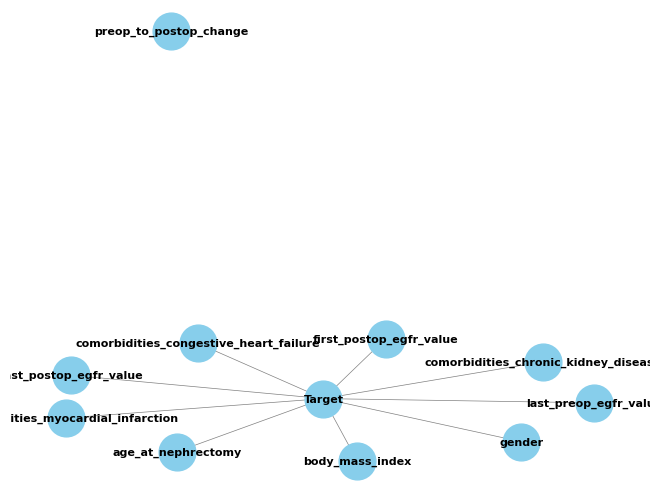

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (features)
for feature in feature_importance_df['Feature']:
    G.add_node(feature)

# Add edges based on relationships
# For example, you might connect features with non-zero importance
for index, row in feature_importance_df.iterrows():
    if row['Importance'] > 0:
        G.add_edge('Target', row['Feature'])

# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, edge_color='gray', width=0.5)
plt.show()


In [ ]:
!pip install torch-geometric

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv

# Define a simple GNN model
class GNNModel(nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = torch.relu(x)
        x = self.conv2(x, edge_index)
        return x

# Generate a dummy graph data (replace this with your actual data)
# For simplicity, I'm using a single graph with 10 nodes and 2 features
edge_index = torch.tensor([[0, 1, 1, 2, 2, 3, 4, 5, 5, 6],
                           [1, 0, 2, 1, 3, 2, 5, 4, 6, 5]], dtype=torch.long)
x = torch.randn(10, 2)  # 10 nodes, 2 features
y = torch.randint(0, 3, (10,))  # 3 classes

graph_data = Data(x=x, edge_index=edge_index, y=y)

# Train the GNN model
gnn_model = GNNModel(num_features=2, hidden_dim=16, num_classes=3)
optimizer = optim.Adam(gnn_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

for epoch in range(100):
    gnn_model.train()
    optimizer.zero_grad()
    output = gnn_model(graph_data)
    loss = criterion(output, graph_data.y)
    loss.backward()
    optimizer.step()

# Evaluate the GNN model on the entire graph
gnn_model.eval()
with torch.no_grad():
    test_output = gnn_model(graph_data)
    probs = torch.softmax(test_output, dim=1)
    predicted_labels = torch.argmax(probs, dim=1)

print("Predicted Labels:", predicted_labels)
print("Ground Truth Labels:", graph_data.y)


Predicted Labels: tensor([2, 1, 1, 0, 0, 0, 0, 1, 0, 0])
Ground Truth Labels: tensor([2, 1, 0, 1, 0, 1, 0, 1, 0, 0])
